In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.contingency import margins
from scipy.stats import norm
import numpy as np

In [2]:
df = pd.read_csv("Aerofit_treadmill.csv")

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.shape

(180, 9)

In [8]:
df.head(3)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66


In [9]:
df.Age.dtype

dtype('int64')

# Detecting Outliers

<AxesSubplot:xlabel='Product', ylabel='Age'>

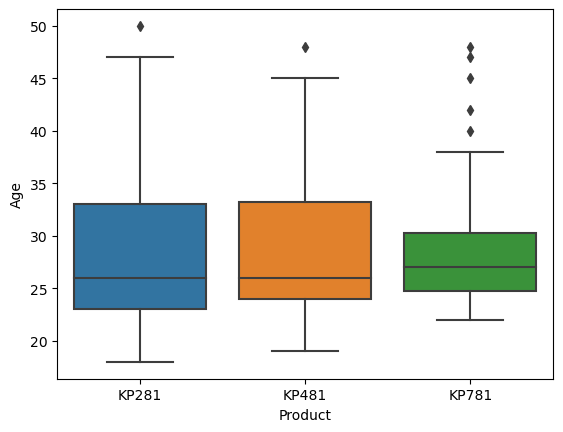

In [10]:
sns.boxplot(data=df,x="Product",y="Age")

<AxesSubplot:xlabel='Product', ylabel='Usage'>

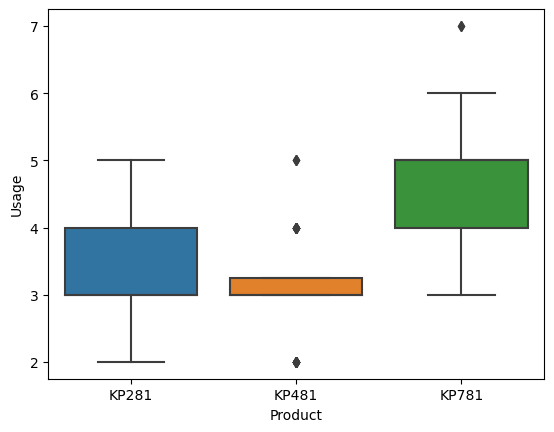

In [11]:
sns.boxplot(data=df,x="Product",y="Usage")

<AxesSubplot:xlabel='Product', ylabel='Income'>

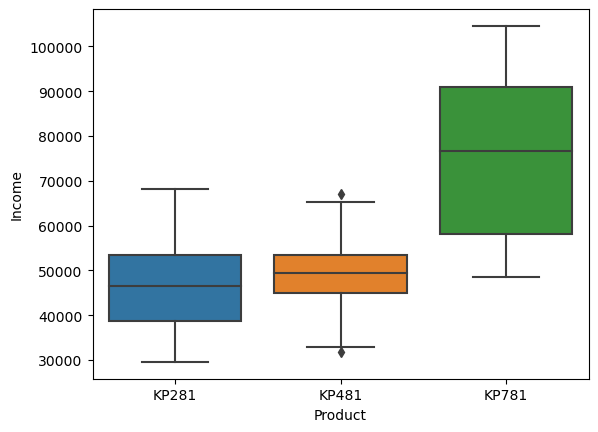

In [12]:
sns.boxplot(data=df,x="Product",y="Income")

<AxesSubplot:xlabel='Product', ylabel='Miles'>

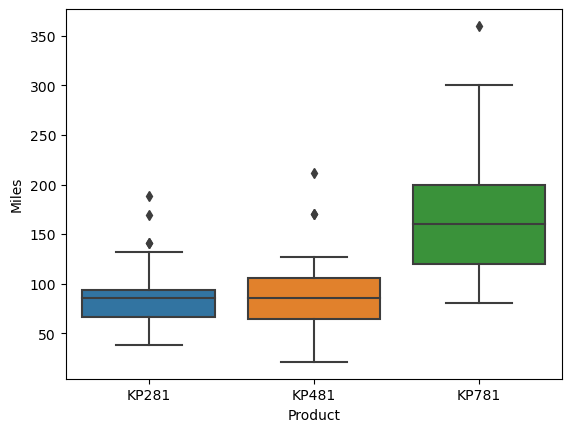

In [13]:
sns.boxplot(data=df,x="Product",y="Miles")

<AxesSubplot:xlabel='Product', ylabel='count'>

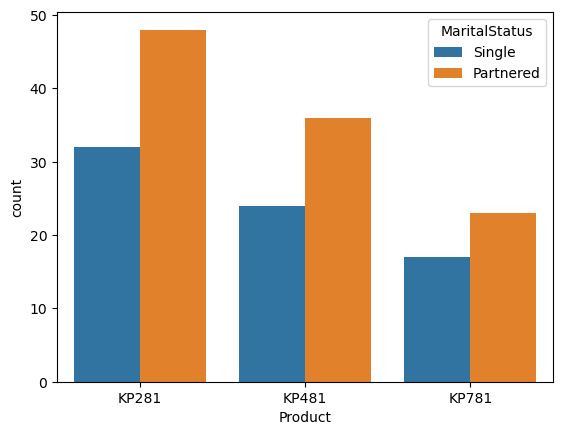

In [14]:
sns.countplot(data=df,x="Product",hue="MaritalStatus")

<AxesSubplot:xlabel='Product', ylabel='Age'>

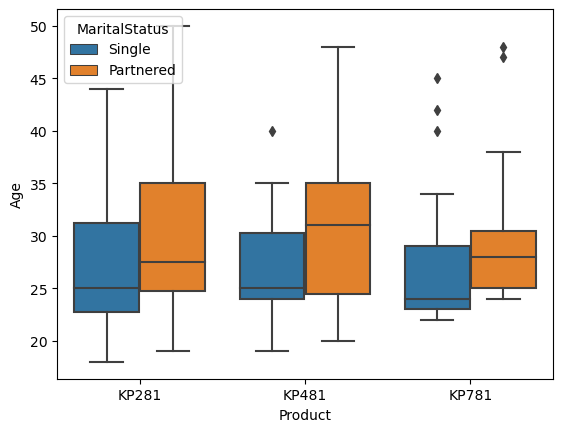

In [15]:
sns.boxplot(data=df,x="Product",y= "Age", hue="MaritalStatus")

<AxesSubplot:xlabel='Product', ylabel='Age'>

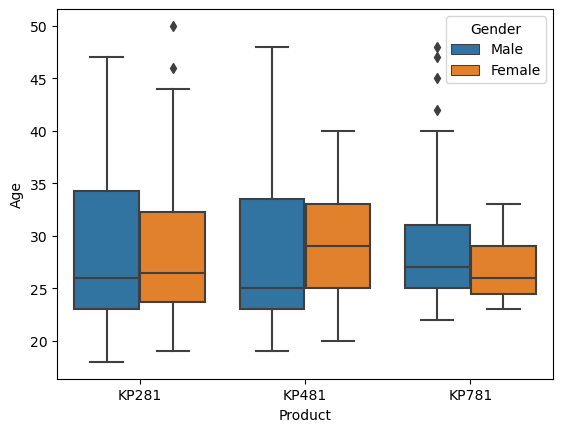

In [16]:
sns.boxplot(data=df,x="Product",y= "Age", hue="Gender")

# Contigency Table

In [17]:
pd.crosstab(df["Product"], df["Gender"],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [18]:
#Probablility of product KP781 given Female
7/76

0.09210526315789473

In [19]:
#Probablility of product KP781 given Male
33/104

0.3173076923076923

In [20]:
#Probablility of product KP481 given Female
29/76

0.3815789473684211

In [21]:
#Probablility of product KP481 given Male
31/104

0.2980769230769231

In [22]:
#Probablility of product KP281 given Female
40/76

0.5263157894736842

In [23]:
#Probablility of product KP281 given Male
40/104

0.38461538461538464

In [24]:
pd.crosstab(df["Product"], df["MaritalStatus"],margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


#From the above table, 
1. 44% of people bought KP281
2. 33% of people bought KP481
3. 22% of people bought KP781


<AxesSubplot:>

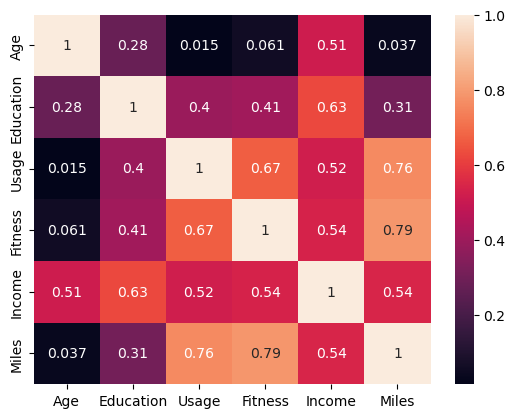

In [25]:
sns.heatmap(df.corr(),annot=True)

1. Fitness, Usage are highly positively correlated with Miles
2. Income is positively correlated with other variables, which means if age is increasing the income also increases.
3. If the usage of threadmill is high their fitness level also high.

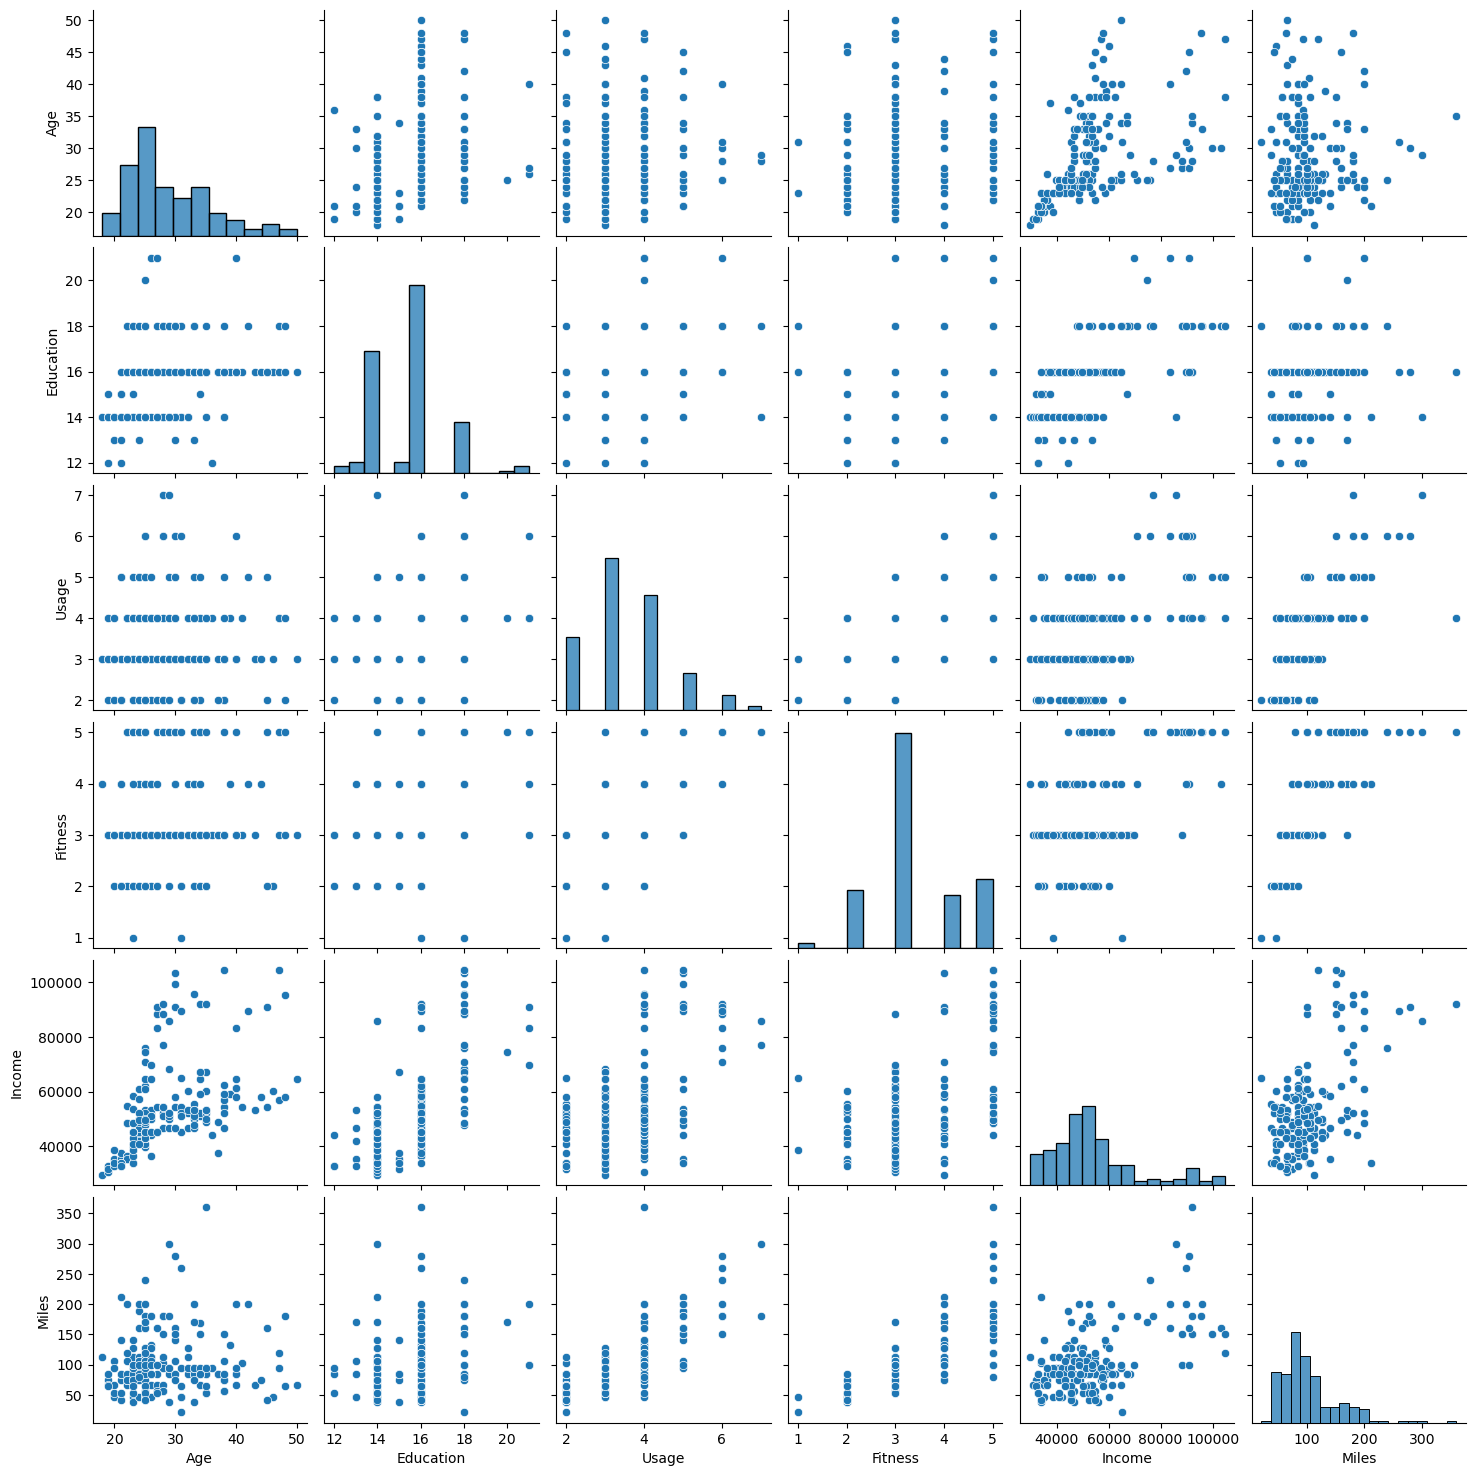

In [26]:
sns.pairplot(data=df)

In [27]:
pd.crosstab(df["Product"], df["Gender"],margins=True,normalize=True)*100

Gender,Female,Male,All
Product,,,
KP281,22.222222,22.222222,44.444444
KP481,16.111111,17.222222,33.333333
KP781,3.888889,18.333333,22.222222
All,42.222222,57.777778,100.000000


1. What is the probability of a male customer buying a KP781 treadmill?

   Ans:18.33% of Male customers KP781

2. What is the probability of a female customer buying a KP781 treadmill?
    
   Ans: 3.88% of Female customers bought KP781

In [28]:
pd.crosstab(df["Product"], df["MaritalStatus"],margins=True,normalize=True)*100

MaritalStatus,Partnered,Single,All
Product,,,
KP281,26.666667,17.777778,44.444444
KP481,20.000000,13.333333,33.333333
KP781,12.777778,9.444444,22.222222
All,59.444444,40.555556,100.000000


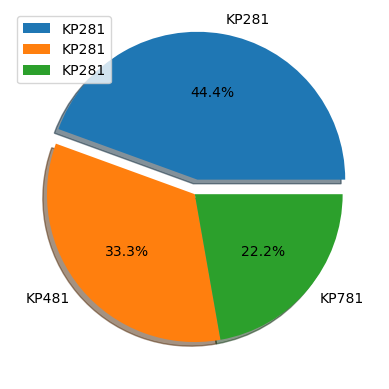

In [29]:
plt.pie(x=df["Product"].value_counts(),labels=["KP281","KP481","KP781"],autopct='%1.1f%%',explode=[0.1,0,0],shadow=True)
plt.legend(df["Product"],loc="upper left")

From the above table, we can see that,

1. Most of the married people are buying treadmill compared to singles,
2. 26% of Married people buying KP281, 20% of Married people buying KP481,12% of married people are buying KP781

In [30]:
df["Income"].max(), df["Income"].min()

(104581, 29562)

<AxesSubplot:xlabel='Income', ylabel='Count'>

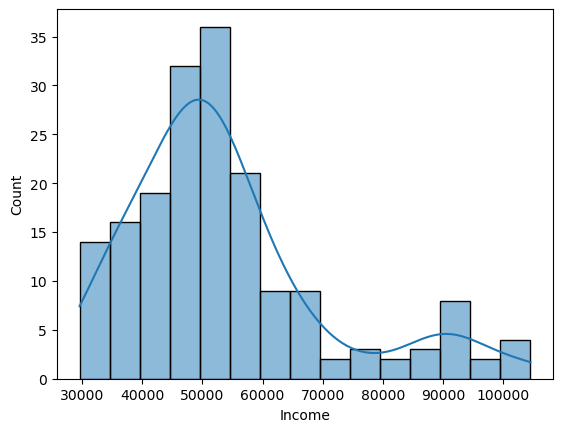

In [31]:
sns.histplot(data=df,x="Income",kde=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

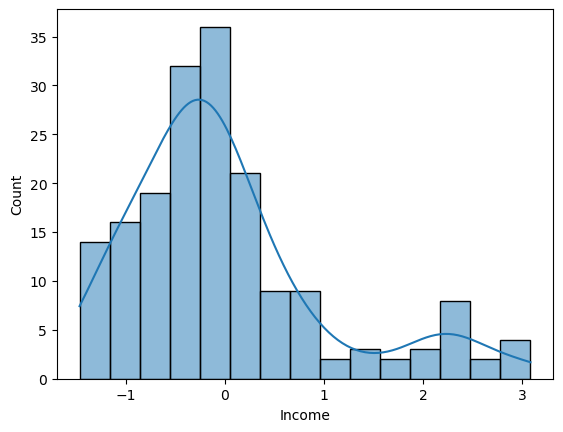

In [32]:
sns.histplot(data=df, x=(df["Income"] - df["Income"].mean())/df["Income"].std(),kde=True)

In [33]:
norm.cdf((60000 - df["Income"].mean())/df["Income"].std())

0.6482045084887522

In [34]:
1 - norm.cdf((60000 - df["Income"].mean())/df["Income"].std())

0.3517954915112478

<AxesSubplot:xlabel='Miles', ylabel='Count'>

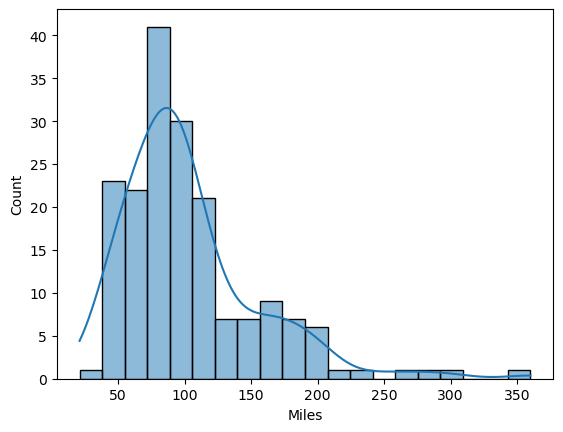

In [35]:
sns.histplot(data=df,x="Miles",kde=True)

In [36]:
df[df["Usage"] >=6]["Income"]

154    70966
155    75946
162    92131
163    77191
164    88396
166    85906
167    90886
170    89641
175    83416
Name: Income, dtype: int64

In [37]:
df[df["Fitness"] ==5].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,31.000000,31.000000,31.000000,31.0,31.000000,31.000000
mean,29.806452,17.064516,4.838710,5.0,74396.709677,178.935484
std,7.295749,1.436094,1.003221,0.0,19866.024082,60.290926
min,22.000000,14.000000,3.000000,5.0,44343.000000,80.000000
25%,24.000000,16.000000,4.000000,5.0,53536.000000,150.000000
50%,28.000000,16.000000,5.000000,5.0,77191.000000,170.000000
75%,33.500000,18.000000,5.500000,5.0,91508.500000,200.000000
max,48.000000,21.000000,7.000000,5.0,104581.000000,360.000000


In [38]:
Probability_of_kp781_given_incomegreater_than_70000 = df[(df["Product"] =="KP781")&(df["Income"]>70000)].shape[0]/df[(df["Income"]>50000)].shape[0]
Probability_of_kp781_given_incomegreater_than_70000

0.23711340206185566

In [39]:
df[df["Fitness"] ==3]["Product"].value_counts()

KP281    54
KP481    39
KP781     4
Name: Product, dtype: int64

In [40]:
df[df["Fitness"] ==5]["MaritalStatus"].value_counts()

Partnered    18
Single       13
Name: MaritalStatus, dtype: int64

In [41]:
df[df["Fitness"] ==5]["Gender"].value_counts()

Male      25
Female     6
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Miles', ylabel='Income'>

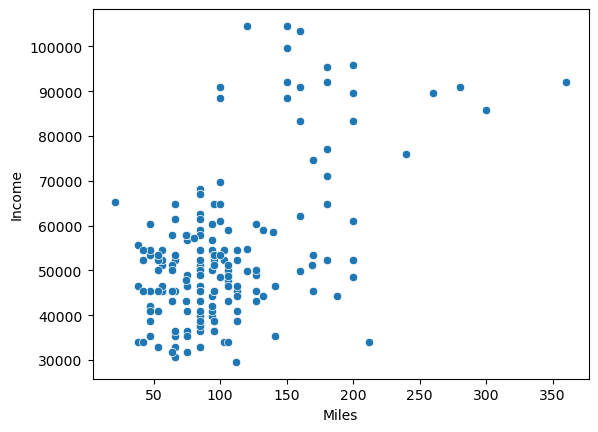

In [42]:
sns.scatterplot(data=df,x="Miles",y="Income")

# Conditional Probabilities of products given Income range

In [43]:
#Probability of KP781 given that income greater than 70000
df[(df["Product"] =="KP781")&(df["Income"]>70000)].shape[0]/df[(df["Income"]>70000)].shape[0]

1.0

In [44]:
#Probability of KP481 given that income greater than 50000
df[(df["Product"] =="KP481")&(df["Income"]>20000)].shape[0]/df[(df["Income"]>20000)].shape[0]

0.3333333333333333

In [45]:
#Probability of KP481 given that income lesser than 70000 and greater than 50000
df[(df["Product"] =="KP481")&((df["Income"]>=50000) & (df["Income"]<=70000))].shape[0]/df[(df["Income"]>=50000) & (df["Income"]<=70000)].shape[0]

0.40540540540540543

In [46]:
#Probability of KP281 given that income lesser than 50000 and greater than 20000
df[(df["Product"] =="KP281")&((df["Income"]>=20000) & (df["Income"]<=50000))].shape[0]/df[(df["Income"]>=20000) & (df["Income"]<=70000)].shape[0]

0.3057324840764331

In [47]:
df[(df["Income"]>60000)].shape

(42, 9)

In [48]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<AxesSubplot:xlabel='Miles', ylabel='Income'>

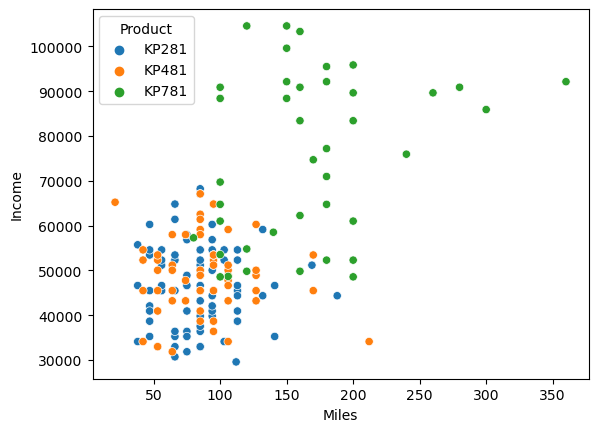

In [49]:
sns.scatterplot(data=df,x="Miles",y="Income",hue="Product")

# Conditional Probabilities of product given Miles

In [50]:
#Probability of Miles > 200 given that the product is KP781
df[(df["Product"] =="KP781")&(df["Miles"]>200)].shape[0]/df[(df["Miles"]>200)].shape[0]

0.8333333333333334

In [51]:
#Probability of Miles > 200 given that the product is KP481
df[(df["Product"] =="KP481")&(df["Miles"]>200)].shape[0]/df[(df["Miles"]>200)].shape[0]

0.16666666666666666

In [52]:
#Probability of Miles > 200 given that the product is KP281
df[(df["Product"] =="KP281")&(df["Miles"]>200)].shape[0]/df[(df["Miles"]>200)].shape[0]

0.0

In [53]:
#Probability of Miles > 100 and Miles<200 given that the product is KP481
df[(df["Product"] =="KP481")&((df["Miles"]<=200) & (df["Miles"]>=100))].shape[0]/df[((df["Miles"]<=200) & (df["Miles"]>=100))].shape[0]

0.22388059701492538

In [54]:
#Probability of Miles <100  given that the product is KP481
df[(df["Product"] =="KP481")&(df["Miles"]<=100)].shape[0]/df[(df["Miles"]<=200)].shape[0]

0.25287356321839083

In [55]:
#Probability of Miles > 100 and Miles<200 given that the product is KP281
df[(df["Product"] =="KP281")&((df["Miles"]<=200) & (df["Miles"]>=100))].shape[0]/df[((df["Miles"]<=200) & (df["Miles"]>=100))].shape[0]

0.26865671641791045

In [56]:
#Probability of Miles < 100  given that the product is KP281
df[(df["Product"] =="KP281")&(df["Miles"]<=100)].shape[0]/df[(df["Miles"]<=200)].shape[0]

0.3563218390804598

In [57]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<AxesSubplot:xlabel='Age', ylabel='Income'>

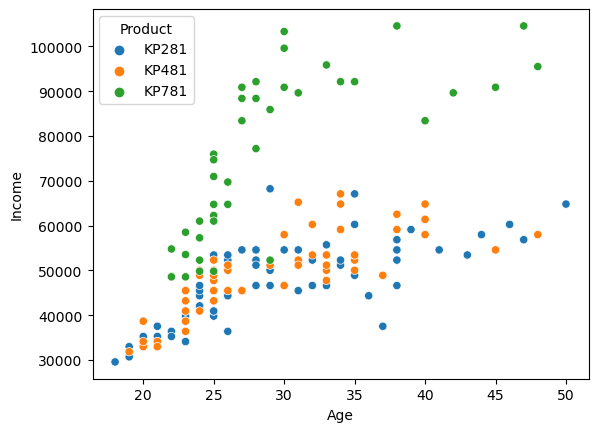

In [58]:
sns.scatterplot(data=df, x="Age",y="Income",hue="Product")

<AxesSubplot:xlabel='Age', ylabel='Miles'>

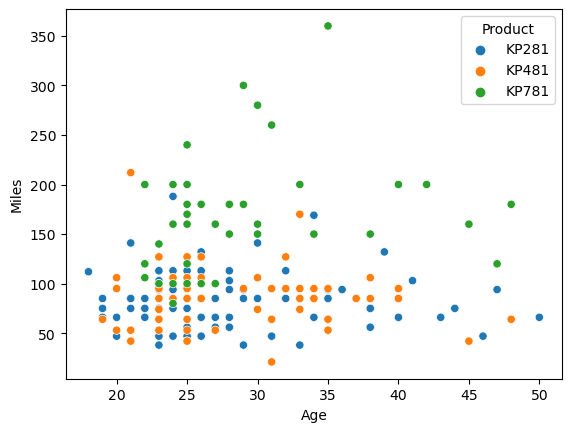

In [59]:
sns.scatterplot(data=df, x="Age",y="Miles",hue="Product")

<AxesSubplot:xlabel='Product', ylabel='Age'>

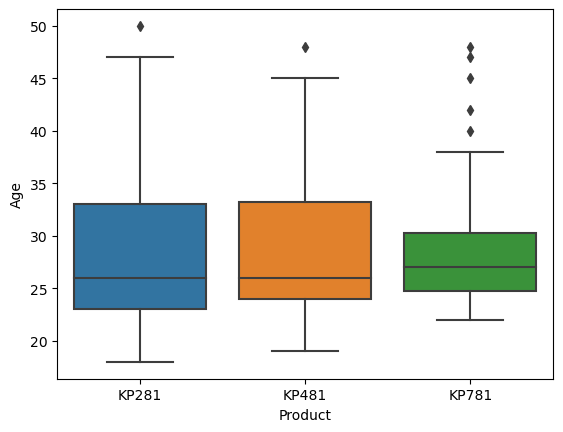

In [60]:
sns.boxplot(data=df, x="Product",y="Age")

# Conditional Probabilites of product given Age

In [61]:
# Probabililty of buying product KP781 given age greater than 30
df[(df["Product"] =="KP781")&(df["Age"]>=23)].shape[0]/df[(df["Age"]>=23)].shape[0]

0.23717948717948717

In [62]:
# Probabililty of buying product KP781 given age lesser than 30
df[(df["Product"] =="KP781")&(df["Age"]<30)].shape[0]/df[(df["Age"]<30)].shape[0]

0.23893805309734514

In [63]:
# Probabililty of buying product KP481 given age lesser than 30
df[(df["Product"] =="KP481")&(df["Age"]<30)].shape[0]/df[(df["Age"]<30)].shape[0]

0.2920353982300885

In [64]:
# Probabililty of buying product KP281 given age lesser than 30
df[(df["Product"] =="KP281")&(df["Age"]>30)].shape[0]/df[(df["Age"]>30)].shape[0]

0.4166666666666667

In [65]:
df.head(4)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85


In [66]:
df["Education"].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

c:\Users\revan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\revan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


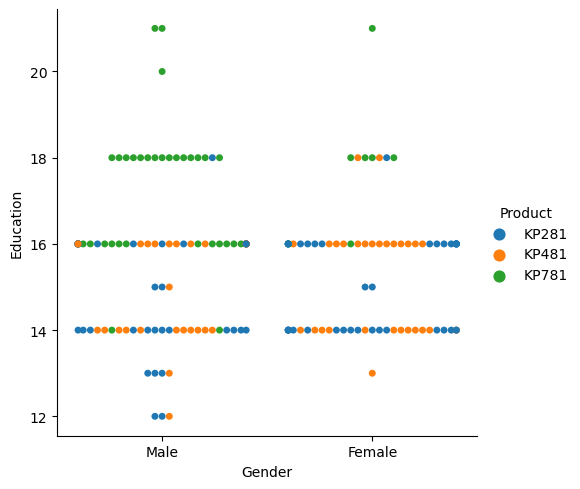

In [67]:
sns.catplot(data=df,x="Gender",y="Education",hue = "Product",kind="swarm")

# Confitional Probability of products based of Education

In [68]:
# Probability of product KP281 Given Education greater than 18
df[(df["Product"] == "KP281") & (df["Education"]>=18)].shape[0] / df[df["Education"]>=18].shape[0]

0.07407407407407407

In [69]:
# Probability of product KP481 Given Education greater than 18
df[(df["Product"] == "KP481") & (df["Education"]>=18)].shape[0] / df[df["Education"]>=18].shape[0]

0.07407407407407407

In [70]:
# Probability of product KP781 Given Education greater than 18
df[(df["Product"] == "KP781") & (df["Education"]>=16)].shape[0] / df[df["Education"]>=16].shape[0]

0.3392857142857143

In [71]:
# Probability of product KP281 Given Education lesser than 18
df[(df["Product"] == "KP281") & (df["Education"]<18)].shape[0] / df[df["Education"]<18].shape[0]

0.5098039215686274

In [72]:
# Probability of product KP281 Given Education between 12 to 16
df[(df["Product"] == "KP281") & (df["Education"]<16) & (df["Education"]>12)].shape[0] / df[(df["Education"]<16) & (df["Education"]>12)].shape[0]

0.5692307692307692

In [73]:
# Probability of product KP481 Given Education between 14 to 18
df[(df["Product"] == "KP281") & (df["Education"]<18) & (df["Education"]>14)].shape[0] / df[(df["Education"]<18) & (df["Education"]>14)].shape[0]

0.4777777777777778

In [74]:
df.head(4)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85


c:\Users\revan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\revan\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


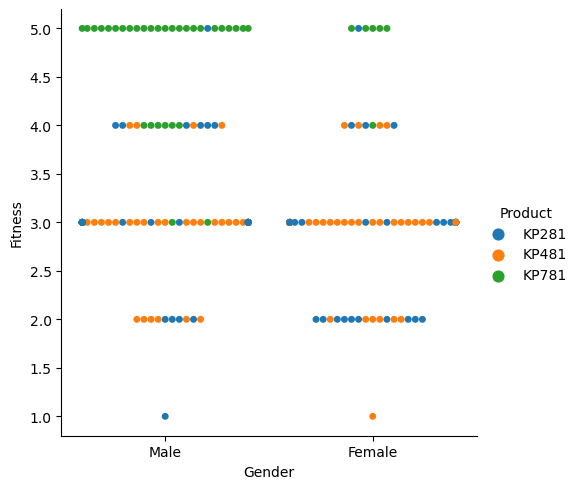

In [75]:
sns.catplot(data=df,x="Gender",y="Fitness",hue = "Product",kind="swarm")

# Coniditonal Probability of product based on fitness level

In [76]:
#Probability of product KP781 given fitness level greater than 4
df[(df["Product"] == "KP781") & (df["Fitness"] >=4)].shape[0]/df[(df["Fitness"] >=4)].shape[0]

0.6545454545454545

In [77]:
#Probability of product KP781 given fitness level == 5
df[(df["Product"] == "KP781") & (df["Fitness"] ==5)].shape[0]/df[(df["Fitness"] ==5)].shape[0]

0.9354838709677419

In [78]:
#Probability of product KP481 given fitness level == 3
df[(df["Product"] == "KP481") & (df["Fitness"] ==3)].shape[0]/df[(df["Fitness"] ==3)].shape[0]

0.4020618556701031

In [79]:
#Probability of product KP481 given fitness level <= 3
df[(df["Product"] == "KP481") & (df["Fitness"] <=3)].shape[0]/df[(df["Fitness"] <=3)].shape[0]

0.416

In [80]:
#Probability of product KP281 given fitness level <= 3
df[(df["Product"] == "KP281") & (df["Fitness"] <=3)].shape[0]/df[(df["Fitness"] <=3)].shape[0]

0.552

# Conditonal Probability based on Usage

<AxesSubplot:xlabel='Usage', ylabel='count'>

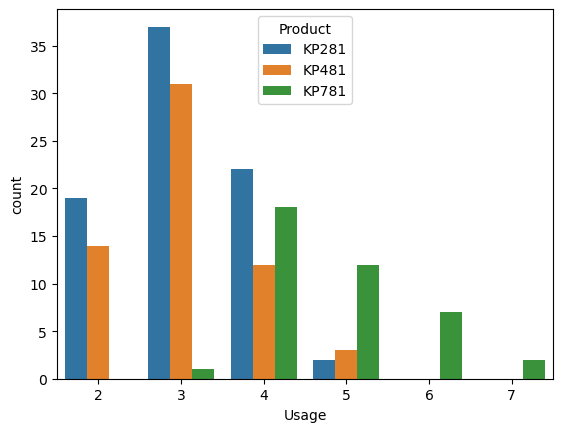

In [81]:
sns.countplot(data=df,x="Usage",hue="Product")

<AxesSubplot:xlabel='Usage', ylabel='Count'>

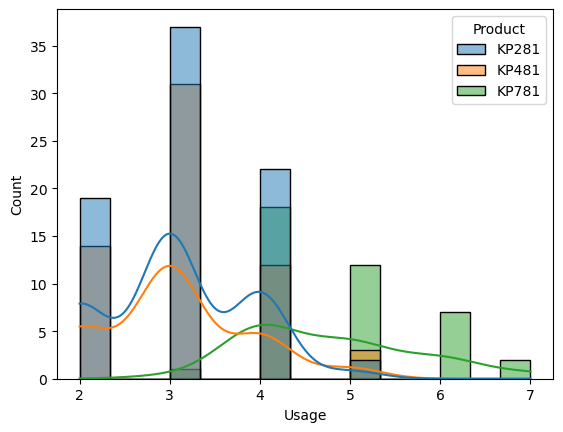

In [82]:
sns.histplot(data=df,x="Usage",hue = "Product", kde=True,color="cyan")

In [83]:
#Probability of usage greater than 4 times a week given product KP781
df[(df["Usage"] >= 4) & (df["Product"] == "KP781")].shape[0] /df[df["Product"] == "KP781"].shape[0]

0.975

In [84]:
#Probability of usage lesser than 4 times a week given product KP281
df[(df["Usage"] <= 4) & (df["Product"] == "KP281")].shape[0] /df[df["Product"] == "KP281"].shape[0]

0.975

In [85]:
#Probability of usage lesser than 3 times a week given product KP281
df[(df["Usage"] <= 3) & (df["Product"] == "KP281")].shape[0] /df[df["Product"] == "KP281"].shape[0]

0.7

In [86]:
#Probability of usage lesser than 4 times a week given product KP481
df[(df["Usage"] <= 4) & (df["Product"] == "KP481")].shape[0] /df[df["Product"] == "KP481"].shape[0]

0.95

In [87]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [88]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

# Categorization

In [89]:
def category(fitness):
    if fitness>=4:
        return "Cardio_Uses"
    elif fitness>2 and fitness<4:
        return "Weight_Loss"
    else:
        return "General"


In [90]:
df["Category"] = df["Fitness"].apply(category)

In [91]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Category
0,KP281,18,Male,14,Single,3,4,29562,112,Cardio_Uses
1,KP281,19,Male,15,Single,2,3,31836,75,Weight_Loss
2,KP281,19,Female,14,Partnered,4,3,30699,66,Weight_Loss
3,KP281,19,Male,12,Single,3,3,32973,85,Weight_Loss
4,KP281,20,Male,13,Partnered,4,2,35247,47,General


In [92]:
#Cardio_Uses
df[df["Fitness"] >= 4].groupby(["Product"])["Usage","Miles","Age"].mean()

C:\Users\revan\AppData\Local\Temp\ipykernel_18416\3585738980.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["Fitness"] >= 4].groupby(["Product"])["Usage","Miles","Age"].mean()


,Usage,Miles,Age
Product,,,
KP281,3.727273,129.909091,29.000000
KP481,3.500000,125.875000,27.625000
KP781,4.861111,174.166667,29.555556


In [93]:
df[df["Fitness"] >= 4].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age"].mean()

C:\Users\revan\AppData\Local\Temp\ipykernel_18416\2600877475.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["Fitness"] >= 4].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age"].mean()


Usage       Miles        Age
Product Gender MaritalStatus                                 
KP281   Female Partnered      4.000000  150.500000  25.000000
               Single         3.000000   94.000000  38.000000
        Male   Partnered      4.000000  135.000000  31.666667
               Single         3.750000  133.750000  24.500000
KP481   Female Partnered      5.000000  212.000000  21.000000
               Single         3.333333  109.333333  28.000000
        Male   Partnered      3.333333  120.333333  30.666667
               Single         3.000000  106.000000  24.000000
KP781   Female Partnered      5.250000  215.000000  29.000000
               Single         5.000000  150.000000  23.500000
        Male   Partnered      4.888889  180.555556  30.277778
               Single         4.666667  155.000000  29.666667

In [94]:
df[df["Fitness"] >= 4].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age"].median()

C:\Users\revan\AppData\Local\Temp\ipykernel_18416\997112317.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["Fitness"] >= 4].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age"].median()


Usage  Miles   Age
Product Gender MaritalStatus                    
KP281   Female Partnered        4.0  150.5  25.0
               Single           3.0   94.0  38.0
        Male   Partnered        4.0  132.0  30.0
               Single           3.5  127.0  23.0
KP481   Female Partnered        5.0  212.0  21.0
               Single           3.0  127.0  26.0
        Male   Partnered        3.0  106.0  33.0
               Single           3.0  106.0  24.0
KP781   Female Partnered        5.5  200.0  29.0
               Single           5.0  150.0  23.5
        Male   Partnered        4.5  165.0  27.5
               Single           5.0  155.0  26.0

In [95]:
df.groupby("Category")["Product"].value_counts()

Category     Product
Cardio_Uses  KP781      36
             KP281      11
             KP481       8
General      KP281      15
             KP481      13
Weight_Loss  KP281      54
             KP481      39
             KP781       4
Name: Product, dtype: int64

In [96]:
#Weight_loss
df[(df["Fitness"] >= 2)&(df["Fitness"]<4)].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age"].mean()

C:\Users\revan\AppData\Local\Temp\ipykernel_18416\3326204159.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df["Fitness"] >= 2)&(df["Fitness"]<4)].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age"].mean()


Usage       Miles        Age
Product Gender MaritalStatus                                 
KP281   Female Partnered      2.760000   68.880000  28.600000
               Single         3.000000   76.090909  27.000000
        Male   Partnered      3.176471   72.470588  31.823529
               Single         3.133333   90.400000  25.933333
KP481   Female Partnered      3.214286   85.571429  30.642857
               Single         2.900000   77.400000  27.900000
        Male   Partnered      2.777778   81.722222  30.333333
               Single         3.333333   89.444444  25.333333
KP781   Female Single         4.000000  100.000000  26.000000
        Male   Partnered      4.000000  100.000000  25.000000
               Single         4.000000  103.000000  24.500000

In [97]:
df[(df["Fitness"] >= 2)&(df["Fitness"]<4)].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age"].median()

C:\Users\revan\AppData\Local\Temp\ipykernel_18416\1730690076.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[(df["Fitness"] >= 2)&(df["Fitness"]<4)].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age"].median()


Usage  Miles   Age
Product Gender MaritalStatus                    
KP281   Female Partnered        3.0   66.0  27.0
               Single           3.0   75.0  24.0
        Male   Partnered        3.0   75.0  31.0
               Single           3.0   85.0  25.0
KP481   Female Partnered        3.0   85.0  32.0
               Single           3.0   79.5  25.0
        Male   Partnered        3.0   90.0  28.0
               Single           3.0   95.0  25.0
KP781   Female Single           4.0  100.0  26.0
        Male   Partnered        4.0  100.0  25.0
               Single           4.0  103.0  24.5

In [98]:
#General Purpose
df[df["Fitness"] <= 2].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age","Fitness"].mean()

C:\Users\revan\AppData\Local\Temp\ipykernel_18416\319462389.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df[df["Fitness"] <= 2].groupby(["Product","Gender","MaritalStatus"])["Usage","Miles","Age","Fitness"].mean()


Usage      Miles        Age  Fitness
Product Gender MaritalStatus                                         
KP281   Female Partnered      2.428571  49.857143  28.142857      2.0
               Single         2.000000  50.333333  32.666667      2.0
        Male   Partnered      2.800000  47.000000  24.800000      1.8
KP481   Female Partnered      3.000000  63.500000  29.000000      2.0
               Single         2.600000  53.000000  27.600000      1.8
        Male   Partnered      2.200000  46.400000  29.400000      2.0
               Single         4.000000  53.000000  27.000000      2.0

# Actionable Insights

In [99]:
# KP781 was bought by customers who was earning above 65k annual, KP481 was bought by customers earning in range of 40 to 65k
# KP281 was bought by below 40k income users
# Those who are using treadmill above 4 times per week are having great fitness in the scale of 4 - 5, we can consider them as cardio_uses, fitness people
# Some people using treadmill in the range of 2-4 and they are having fitness scale in the average of 3-4, we can consider them as weight loss people
# Some People are not that much interested in treadmill, they also have very low fitness scale, they all under general purpose 
# Majority of people or buying KP281 and KP241
# Those who bought KP781 are seriously using their treadmill and getting fitted by using treadmill 5 times per week and they used to walk above 150 miles per week
# Customers earning above 65k was highly possible of buying KP781
# We can split customers in 3 buckets based on their Use cases. 
# Cardio_uses,                 Weight_loss,                     General purpose.
#  Income>60000              Income between 40k to 60k          Income < 30k
#  Usage >= 4/week              3 > Usage>4                         Usage<=3 
# The products is highly correlated with many variables like usage, income, fitness, education


# Business Recommendations

In [100]:
# Aerofit can sell KP781 whose are earning above 60k Annual income
# Based on their customer profile we can sell products easily, for general purpose we can promote KP281, For weight_loss we can promote KP481,
# Fitness freak people always used to buy KP781, we can promote based on their fitness, usage.
# If the customers are Married there is a high chance of selling KP481 and KP781
# In an online portal we can create filters for usage and fitness, Based on the filters selected by customers we can promote them any of the particular product.
